In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
#df to use
df = pd.read_csv("df_sum_score.csv")

In [4]:
df.head()

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG
0,0,F,Stratum 4,81,61,82,93,71,93,85.666667,74.666667
1,1,F,Stratum 5,75,66,88,38,86,98,74.000000,76.333333
2,2,M,Stratum 2,49,38,42,1,18,43,20.666667,43.000000
3,3,F,Stratum 2,55,51,73,35,76,80,63.666667,59.666667
4,4,M,Stratum 4,65,76,92,94,98,100,97.333333,77.666667


In [17]:
df.HI_GRADE_AVG.value_counts().sort_index(ascending=False)

100.000000    1
97.666667     1
96.666667     2
95.000000     1
94.000000     2
             ..
33.666667     1
32.333333     1
32.000000     1
30.333333     1
26.000000     1
Name: HI_GRADE_AVG, Length: 182, dtype: int64

### Basic plots

### plots from kat

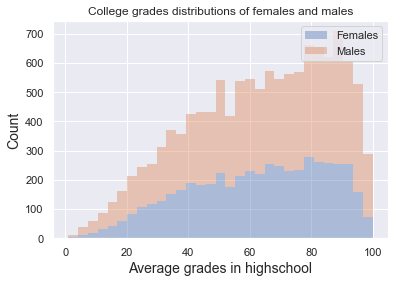

In [13]:


# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in highschool", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')


### Create "Baseline algorithm"

In [4]:
df["diff_hi_col"] = df["COL_GRADE_AVG"]-df["HI_GRADE_AVG"]

In [5]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [6]:
df_sort100 = df_sort[:100]

Tag top 100 og sammenlign deres average COL grade med overall average COL grade

In [7]:
df_sort100

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,diff_hi_col
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,-1.333333
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1.000000
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0.666667
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,-0.333333
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6145,6145,M,Stratum 4,71,91,95,100,100,99,99.666667,85.666667,14.000000
6269,6269,M,Stratum 1,100,67,90,100,96,99,98.333333,85.666667,12.666667
8041,8041,M,Stratum 3,82,90,85,100,99,96,98.333333,85.666667,12.666667
8352,8352,M,Stratum 6,75,82,100,42,2,94,46.000000,85.666667,-39.666667


In [8]:
#top 100 average HI grade vs overall HI grade
print("ratio top 100 vs all ", (df_sort100.HI_GRADE_AVG.mean())/(df.HI_GRADE_AVG.mean()), "\ntop 100 avg HI grade", df_sort100.HI_GRADE_AVG.mean()
      ,"\noverall HI grade    ", df.HI_GRADE_AVG.mean())

ratio top 100 vs all  1.4532039401322123 
top 100 avg HI grade 88.7833333333333 
overall HI grade     61.094888942604854


In [9]:
#top 100 average col grade vs overall col grade
print("ratio top 100 vs all ", (df_sort100.COL_GRADE_AVG.mean())/(df.COL_GRADE_AVG.mean()), "\ntop 100 avg col grade", df_sort100.COL_GRADE_AVG.mean()
      ,"\noverall col grade    ", df.COL_GRADE_AVG.mean())

ratio top 100 vs all  1.5060529808104461 
top 100 avg col grade 94.82333333333332 
overall col grade     62.96148577874494


Hypothesis: high high school score = high college score

Check if the two means are significant: måske lidt svært når de ikke har ens fordelinger/std. - SENERE

Check diversity

In [10]:
df_sort100["GENDER"].value_counts()

M    72
F    28
Name: GENDER, dtype: int64

In [11]:
df_sort100["STRATUM"].value_counts()

Stratum 3    32
Stratum 4    27
Stratum 5    18
Stratum 6    15
Stratum 2     7
Stratum 1     1
Name: STRATUM, dtype: int64

Diff average mellem HI og COL score i top 100 og i resten

In [12]:
print("ratio diff top 100 vs all", (df_sort100.diff_hi_col.mean())/(df.diff_hi_col.mean()), "\ntop 100 diff", df_sort100.diff_hi_col.mean()
      ,"\noverall diff", df.diff_hi_col.mean())

ratio diff top 100 vs all 3.235835335760225 
top 100 diff 6.040000000000001 
overall diff 1.8665968361399845


In [13]:
(6.04/94.82)*100

6.369964142585953

=Top 100 får i average 6 point(/6.37%?) mere på college

Increasing means

In [19]:
#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#sorted df Hi avg grades
df_avg.HI_GRADE_AVG

5129     100.000000
11864     97.666667
4874      96.666667
7340      96.666667
1089      95.000000
            ...    
3588      33.666667
3741      32.333333
1157      32.000000
3015      30.333333
2012      26.000000
Name: HI_GRADE_AVG, Length: 12411, dtype: float64

In [22]:
#new col with incremeanted hi avg 
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()
df_avg["incr_hi_mean"]

5129     100.000000
11864     98.833333
4874      98.111111
7340      97.750000
1089      97.200000
            ...    
3588      61.104860
3741      61.102541
1157      61.100196
3015      61.097717
2012      61.094889
Name: incr_hi_mean, Length: 12411, dtype: float64

In [23]:
df_avg["n_students"] = range(len(df))

In [24]:
min(df_sort.HI_GRADE_AVG)

26.0

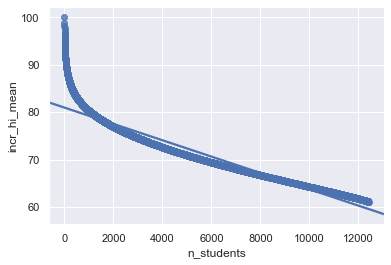

In [42]:
sns.regplot(x="n_students", y="incr_hi_mean", data=df_avg)

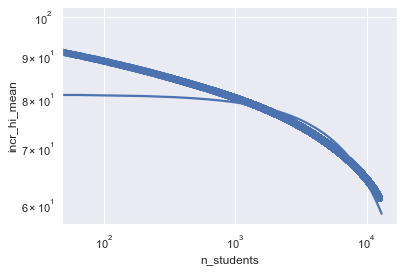

In [43]:
reg = sns.regplot(x="n_students", y="incr_hi_mean", data=df_avg); #fit med beta distribution
reg.set_yscale('log')
reg.set_xscale('log')

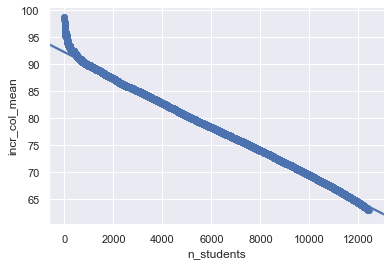

In [27]:
sns.regplot(x="n_students", y="incr_col_mean", data=df_avg);

In [31]:
#lin reg function
import numpy as np
from sklearn.linear_model import LinearRegression
x = df_avg.n_students.values.reshape(-1, 1)
y = df_avg.incr_col_mean.values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y) #

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.9965638974864512
intercept: 92.20914354742432
slope: [-0.00231046]


Check om forskellen mellem average er en funktion af top n students og alle studentsof ratio

In [47]:
df_avg["incr_hi_ratio"] = df_avg.incr_hi_mean/df_avg.HI_GRADE_AVG.mean()
df_avg["incr_hi_ratio"]

5129     1.636798
11864    1.617702
4874     1.605881
7340     1.599970
1089     1.590968
           ...   
3588     1.000163
3741     1.000125
1157     1.000087
3015     1.000046
2012     1.000000
Name: incr_hi_ratio, Length: 12411, dtype: float64

In [50]:
#ratio of female and men

#df_avg["incr_hi_ratio"] = df_avg.incr_hi_mean/df_avg.HI_GRADE_AVG.mean()

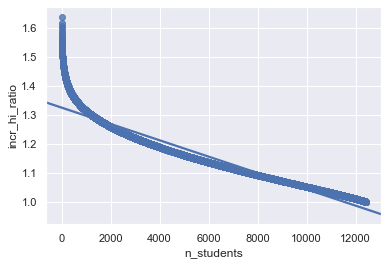

In [48]:
sns.regplot(x="n_students", y="incr_hi_ratio", data=df_avg);

In [49]:
#lin reg function
import numpy as np
from sklearn.linear_model import LinearRegression
x = df_avg.n_students.values.reshape(-1, 1)
y = df_avg.incr_ratio.values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y) #

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.9649945931087545
intercept: 1.2755204959093334
slope: [-4.44029808e-05]
